# Zillow Project

In [58]:
# Imports necessary for the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

import os
import wrangle
from env import host, user, password

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Getting the file

properties_2017 = wrangle.wrangle_zillow()
properties_2017.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,propertylandusetypeid,transactiondate
0,4.0,3.5,3100.0,1023282.0,261.0,2017-01-01
1,2.0,1.0,1465.0,464000.0,261.0,2017-01-01
2,3.0,2.0,1243.0,564778.0,261.0,2017-01-01
3,4.0,3.0,2376.0,145143.0,261.0,2017-01-01
4,4.0,3.0,2962.0,773303.0,261.0,2017-01-01


In [10]:
properties_2017.to_csv('/Users/arsen/codeup-data-science/zillow_project/properties_2017.csv')

In [5]:
# Getting information about number of coulumns, number of rows data type, size of the file (for pushing to github)

properties_2017.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52442 non-null  float64
 1   bathroomcnt                   52442 non-null  float64
 2   calculatedfinishedsquarefeet  52360 non-null  float64
 3   taxvaluedollarcnt             52441 non-null  float64
 4   propertylandusetypeid         52442 non-null  float64
 5   transactiondate               52442 non-null  object 
dtypes: float64(5), object(1)
memory usage: 2.4+ MB


In [6]:
round(properties_2017.isnull().mean(), 4)

bedroomcnt                      0.0000
bathroomcnt                     0.0000
calculatedfinishedsquarefeet    0.0016
taxvaluedollarcnt               0.0000
propertylandusetypeid           0.0000
transactiondate                 0.0000
dtype: float64

In [17]:
for column in properties_2017.columns:
    print(column)
    print(properties_2017[column].value_counts())
    print('\n##########################\n')

bedroomcnt
3.0     23360
4.0     15240
2.0      8340
5.0      3973
6.0       635
1.0       612
0.0       137
7.0       106
8.0        24
9.0         8
12.0        3
10.0        2
14.0        1
11.0        1
Name: bedroomcnt, dtype: int64

##########################

bathroomcnt
2.0     21894
3.0     10673
1.0      9568
2.5      3934
4.0      2227
3.5       918
1.5       841
5.0       803
4.5       687
6.0       322
5.5       224
0.0       121
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
18.0        1
13.0        1
Name: bathroomcnt, dtype: int64

##########################

calculatedfinishedsquarefeet
1120.0    128
1200.0    119
1080.0    102
1040.0     86
936.0      86
         ... 
7088.0      1
604.0       1
5422.0      1
534.0       1
5655.0      1
Name: calculatedfinishedsquarefeet, Length: 4723, dtype: int64

##########################

taxvaluedollarcnt
455000.0    34
600000.0    30
550000.0    24
500000.0    24

## Takeaways
* Observations
    - There are very few null values
    - The column names are hard to read
    - There are no numbers behind the comma of bedroomcnt, calculatedfinishedsquarefeet, and taxvaluedollarcnt
    - The transactiondate is an object type, cannot be scaled
* To-dos
    - Drop null values
    - The propertylandusetypeid column can be dropped. It is an identifier for the type of house I am working on
    - Convert bedroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, and transactiondate to int
    - Leave bathroomcnt as is
    - Rename columns

In [7]:
houses = properties_2017.dropna(axis = 0, how ='any')

In [8]:
print("Properties_2017 length:", len(properties_2017), "\nHouses length:", 
       len(houses), "\nPercentage of rows with at least 1 NA value dropped: ",
       round(((len(properties_2017)-len(houses))/len(properties_2017))*100, 2))

Properties_2017 length: 52442 
Houses length: 52359 
Percentage of rows with at least 1 NA value dropped:  0.16


In [9]:
houses = houses.drop(['propertylandusetypeid'], axis = 1)
houses.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,transactiondate
0,4.0,3.5,3100.0,1023282.0,2017-01-01
1,2.0,1.0,1465.0,464000.0,2017-01-01
2,3.0,2.0,1243.0,564778.0,2017-01-01
3,4.0,3.0,2376.0,145143.0,2017-01-01
4,4.0,3.0,2962.0,773303.0,2017-01-01


In [11]:
# Renaming columns

cols_to_rename = {
    'calculatedfinishedsquarefeet': 'indoor_sqft',
    'taxvaluedollarcnt': 'tax_value',
    'transactiondate': 'sale_date',
    'bedroomcnt': 'bedrooms',
    'bathroomcnt': 'bathrooms',
}

houses = houses.rename(columns=cols_to_rename)
houses.head()

,bedrooms,bathrooms,indoor_sqft,tax_value,sale_date
0,4.0,3.5,3100.0,1023282.0,2017-01-01
1,2.0,1.0,1465.0,464000.0,2017-01-01
2,3.0,2.0,1243.0,564778.0,2017-01-01
3,4.0,3.0,2376.0,145143.0,2017-01-01
4,4.0,3.0,2962.0,773303.0,2017-01-01


In [12]:
# Transforming data types to int particularly sale_date so I can scale it

houses['bedrooms'] = houses['bedrooms'].astype(int)
houses['indoor_sqft'] = houses['indoor_sqft'].astype(int)
houses['tax_value'] = houses['tax_value'].astype(int)
houses['sale_date'] = pd.to_datetime(houses['sale_date']).astype('int64')

houses.head()

,bedrooms,bathrooms,indoor_sqft,tax_value,sale_date
0,4,3.5,3100,1023282,1483228800000000000
1,2,1.0,1465,464000,1483228800000000000
2,3,2.0,1243,564778,1483228800000000000
3,4,3.0,2376,145143,1483228800000000000
4,4,3.0,2962,773303,1483228800000000000


In [13]:
# Checking the data types

houses.dtypes

bedrooms         int64
bathrooms      float64
indoor_sqft      int64
tax_value        int64
sale_date        int64
dtype: object

In [16]:
# Checking the values to see if their proportions relate to each other in a meaningful way

houses.describe().T.astype('int64')

,count,mean,std,min,25%,50%,75%,max
bedrooms,52359,3,0,0,3,3,4,14
bathrooms,52359,2,1,0,2,2,3,18
indoor_sqft,52359,1922,1004,128,1268,1659,2306,21929
tax_value,52359,528020,748323,1000,193644,373374,618531,49061236
sale_date,52359,1495171565782307072,6175659714323023,1483228800000000000,1490227200000000000,1495497600000000000,1500336000000000000,1527206400000000000


## Takeaways
* Observations
    - The max values are high compared to min values in all columns
* To-dos
    - Use graphs to determine outliers
    -

bedrooms


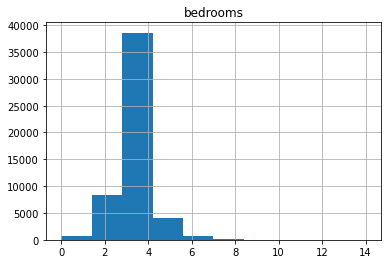

bathrooms


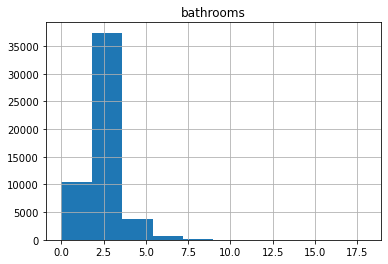

indoor_sqft


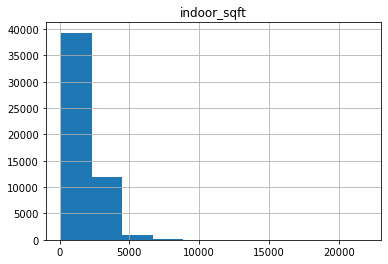

tax_value


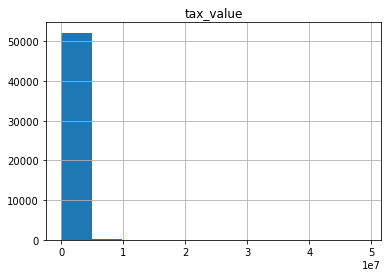

sale_date


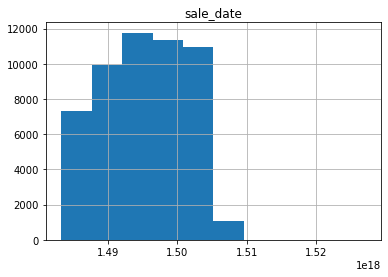

In [18]:
# Using a for loop to plot columns to observe outliers

for column in houses.columns:
    print(column)
    plt.title(column)
    houses[column].hist()
    plt.grid(True)
    plt.show()

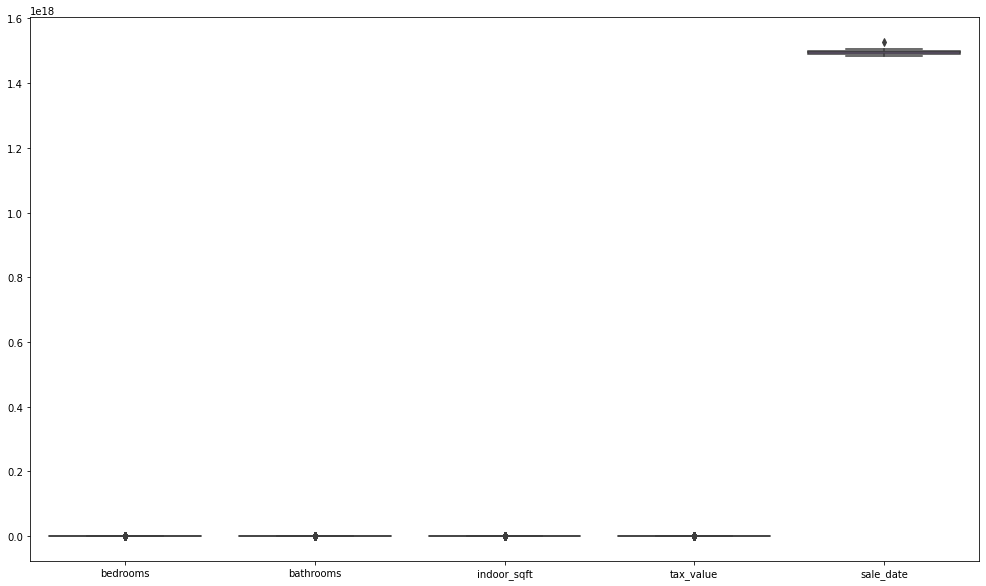

In [23]:
# Plotting a boxplot of all columns to have a better view

plt.figure(figsize=(17,10))
sns.boxplot(data=houses)
plt.show()

# Values are very different between sale_date and the others
# I will plot them separately to havea better view

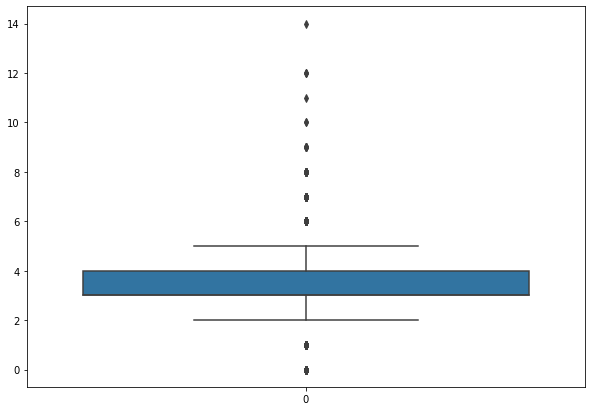

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(data=houses.bedrooms)
plt.show()

# Lots of outliers

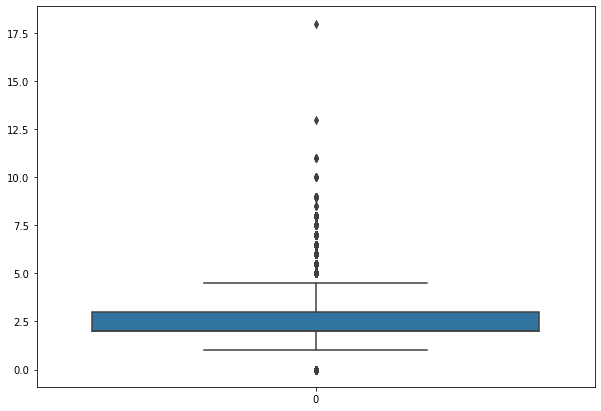

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(data=houses.bathrooms)
plt.show()

# Lots of outliers

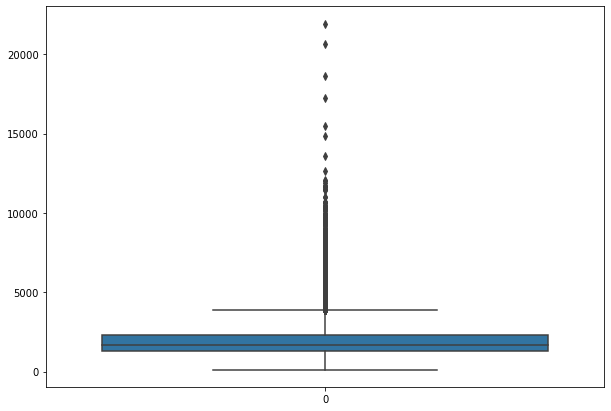

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(data=houses.indoor_sqft)
plt.show()

# Lots of outliers

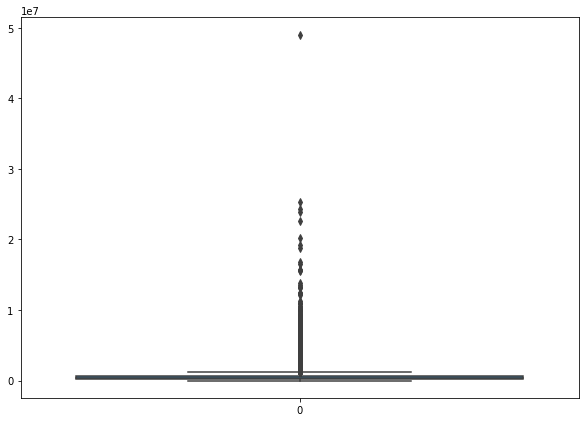

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(data=houses.tax_value)
plt.show()

# Lots of outliers

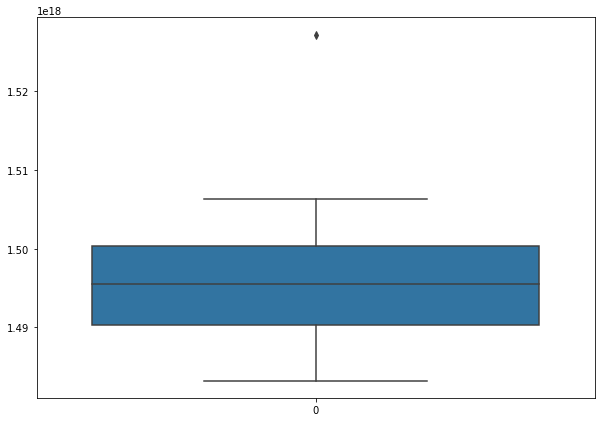

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(data=houses.sale_date)
plt.show()

# Very few outliers

## Takeaways

- Except for the sale_date column, all the others have a lot of outliers
- Since my goal is to predict the tax value of most houses, I will remove what does not constitute 'most houses in the US'
- According to realtor.com, a mansion is in the real estate industry is a house that has 8,000 square feet and above.
- I will cut off outliers that are 8,000 square feet and above.
- 0 bedroom and 0 bathroom do exist in the industry and does not mean that the house does not have any or is not habitable
- .5, .25, .75 bathrooms exist as well and describe the existence of certain amenities in the bathroom like a tub or a sink...

In [31]:
# The proportion of houses that have 7_999 indoor_squarefeet and less

houses[houses.indoor_sqft <= 7_999].shape[0] / houses.shape[0]

0.99791821845337

In [43]:
# Mean of number of bedroooms of houses corresponding to less than 8_000 sqft

houses[houses.indoor_sqft <= 7_999].bedrooms.mean()

3.2996363636363637

In [44]:
# Mean of number of bathrooms of houses corresponding to less than 8_000 sqft

houses[houses.indoor_sqft <= 7_999].bathrooms.mean()

2.292124401913876

## Takeaways
- The proportion obtained are still significant and won't denature the data
- I will filter the data through the <= 7_999 square feet criterion

In [48]:
# Filtering the data through number of bedrooms

houses = houses[houses.indoor_sqft <= 7_999]
houses.head()

,bedrooms,bathrooms,indoor_sqft,tax_value,sale_date
0,4,3.5,3100,1023282,1483228800000000000
1,2,1.0,1465,464000,1483228800000000000
2,3,2.0,1243,564778,1483228800000000000
3,4,3.0,2376,145143,1483228800000000000
4,4,3.0,2962,773303,1483228800000000000


In [47]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52264 entries, 0 to 52441
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     52264 non-null  int64  
 1   bathrooms    52264 non-null  float64
 2   indoor_sqft  52264 non-null  int64  
 3   tax_value    52264 non-null  int64  
 4   sale_date    52264 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 2.4 MB


In [50]:
houses.isnull().mean()

bedrooms       0.0
bathrooms      0.0
indoor_sqft    0.0
tax_value      0.0
sale_date      0.0
dtype: float64

# Scaling

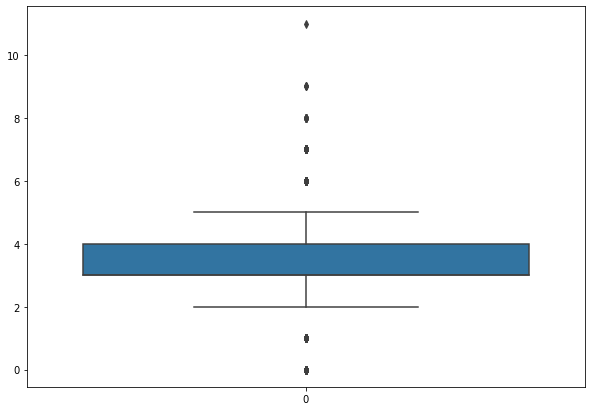

In [54]:
plt.figure(figsize=(10,7))
sns.boxplot(data=houses.bedrooms)
plt.show()


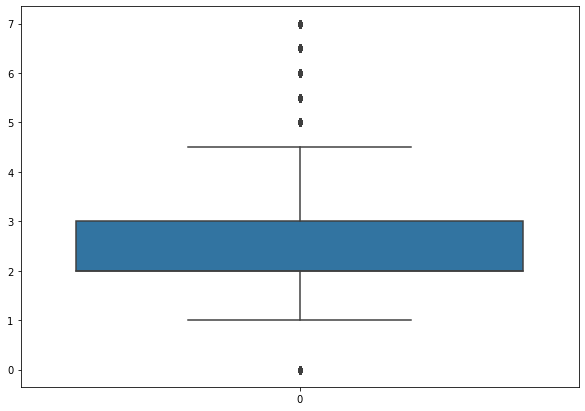

In [63]:
plt.figure(figsize=(10,7))
sns.boxplot(data=houses.bathrooms)
plt.show()


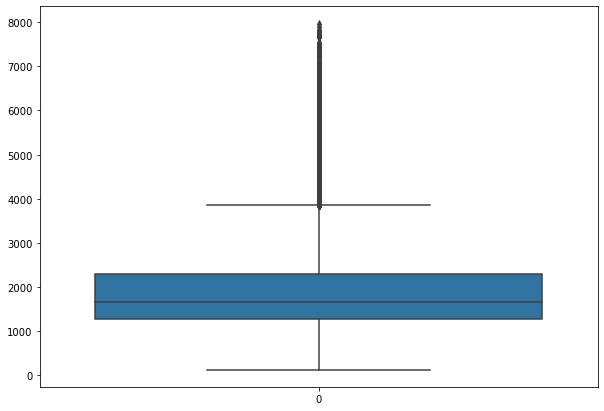

In [56]:
plt.figure(figsize=(10,7))
sns.boxplot(data=houses.indoor_sqft)
plt.show()


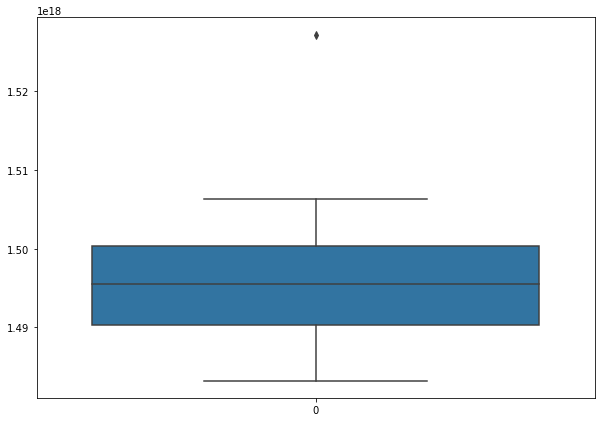

In [57]:
plt.figure(figsize=(10,7))
sns.boxplot(data=houses.sale_date)
plt.show()


## Takeaways
- The median of the indoor_sqft column is toward the bottom 50% of the data
- The median of bedrooms and bathrooms columns are not visible
- The describe().T function shows that the median in probably toward the bottom 25% of the data
- The data still contains a fair number of outliers
- It is probable that a type of Robust Scaler (Robust or Quantile) or a Standard scaler would work best

In [53]:
# Not scaled train DF

# Splits df into train_validate and test using train_test_split()
train_validate, test = train_test_split(houses, test_size=.2, random_state=175)

# splits train_validate into train and validate using train_test_split()
train, validate = train_test_split(train_validate, test_size=.3, random_state=175)

In [59]:
train.shape

(29236, 5)

In [61]:
validate.shape

(12531, 5)

In [60]:
test.shape

(10442, 5)

In [ ]:
standard_scaler = sklearn.preprocessing.StandardScaler()

standard_scaler.fit(train)

train_scaled_standard = standard_scaler.transform(train)
validate_scaled_standard = standard_scaler.transform(validate)
test_scaled_standard = standard_scaler.transform(test)

In [ ]:
robust_scaler = sklearn.preprocessing.RobustScaler()

robust_scaler.fit(train)

train_scaled_robust = robust_scaler.transform(train)
validate_scaled_robust = robust_scaler.transform(validate)
test_scaled_robust = robust_scaler.transform(test)

In [ ]:
quantile_scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

quantile_scaler.fit(train)

quantile_scaled_train = quantile_scaler.transform(train)
quantile_scaled_train = quantile_scaler.transform(validate)
quantile_scaled_train = quantile_scaler.transform(test)

# Exploration on unscaled data

My Null Hypothesis is that there is no correlation between the grades for exam1 and final grade.


My Alternative Hypothesis is that exam1is correlated with final grade.